# 02 Theoretical considerations

## 2.1 Training the Self-Organising-Map (SOM)

The dataset will be used to train a matrix of weight vectors, wherein each weight vector has length equal to the number of features in the dataset (in this case, 18).

The self-organising map will form from $s$ iterations of training, in each of which a vector from the training set will be randomly selected and compared to the existing matrix to find the BMU - best matching unit, or 'closest' weight vector (in terms of Euclidean distance).

The weight matrix will be trained according to the equation:


$$ w_{u'v'}^{s+1} = w_{u'v'}^s + θ(uv, u'v', s) α(s)(I(t) - w_{u'v'}^s)  \quad (1) $$  


where:

- $I(t)$ is a randomly chosen vector from the training set - a new $I(t)$ is chosen on each iteration $s$ of training.
- $w_{u'v'}$ represents the weight vectors of the nodes $n_{u'v'}$ in the matrix, with the formula being applied to each weight vector in turn. $w_{u'v'}^{s}$ is the value of the weight vector before the training step, $w_{u'v'}^{s+1}$ is the value afterwards.
- $uv$ represents the coordinates of the BMU (closest weight vector to the given input vector)
- $u’v’$ represents the coordinate indices (x,y) of the map space node in question
- $θ$ is the theta function, which determines the spacial component of learning - i.e. which neighbouring nodes are affected and by how much.
- $α$ is the alpha function, which determines the rate of learning - i.e. how much neighbouring nodes are affected for each iteration $s$

The above list provides a selection of functions that need to be tested to improve the performance of the SOM, which are outlined below.

## 2.2 Functions to be chosen and tuned

There is a choice of two alpha functions that could be applied to train the matrix.  One is labelled 'per' and the other 'exp'.

### 2.2.1 'per' alpha function

This function adjusts the learning rate purely according to how many iterations are left in the training phase:  

$$α(s) = α_i * ((\lambda - s) / \lambda)$$

where:

- $α_i$ (referred to in the code as `initial_value`) is a constant determined through hyperparameter tuning
- $\lambda$ (referred to in the code as `max_iterations`) is the total number of iterations performed in training (i.e. $s_{max}$
- $s$ is the current iteration

Therefore the value returned by the alpha function is the fraction of iterations left in training multiplied by the initial value $α_i$ (hence its label 'per' from 'percentage' or 'per iteration').

The value of alpha will vary as shown below in an example function where $α_i$ is 1 and $\lambda$ is 1000 (blue), and another where $α_i$ is 0.5 and $\lambda$ is 1000 (green). On the final iteration, the learning rate is always 0.

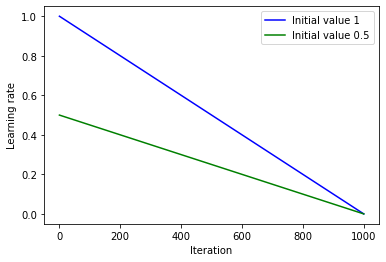

In [1]:
import matplotlib.pyplot as plt

def example_per_alpha(s, initial_value):
    return initial_value * ((1000 - s)/1000)

x = list(range(0,1001,10))
y1 = [example_per_alpha(s,1) for s in x]
y2 = [example_per_alpha(s,0.5) for s in x]

plt.plot(x,y1, color='blue', label='Initial value 1')
plt.plot(x,y2, color='green', label='Initial value 0.5')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()

### 2.2.2 'exp' alpha function

This function adjusts the learning rate according to an exponential decay formula:

$$α(s) = α_i \times {2}^{\frac{-s}{h\lambda}}$$

where:

- $h$ (referred to in the code as `half_life` or `half_life_frac`) is a constant determined through hyperparameter tuning, that sets the half life of the exponential decay. The half-life of the decay is $h \times \lambda$.

Therefore the value returned by the alpha function will initially be $~α_i$ and will halve every $h \times \lambda$ iterations.

The value of alpha will vary as shown below in an example function where $α_i$ is 1, $h$ is 0.5 and $\lambda$ is 1000.
The half life has been plotted in orange to demonstrate that at $h\lambda$ iterations, the alpha value has halved.

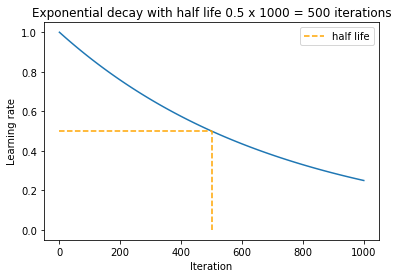

In [2]:
def example_exp_alpha(s, initial_value, h):
    exponent = -s/(h*1000)
    return initial_value*2.0**exponent

x = list(range(0,1001,10))
y = [example_exp_alpha(s, 1, 0.5) for s in x]

plt.plot(x,y,)
plt.plot([0,500], [0.5,0.5], '--', color='orange', label='half life')
plt.plot([500,500], [0.0, 0.5], '--', color='orange')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.title('Exponential decay with half life 0.5 x 1000 = 500 iterations')
plt.show()

### 2.2.3 Comparison of functions and parameter tuning

In the following notebook hyper-parameter tuning is performed to select the most appropriate alpha function and to select appropriate values for $\alpha_i$, $\lambda$ and $h$.

The effect of varying these functions is demonstrated below where several possible values for $\alpha_i$ and $h$ are selected.

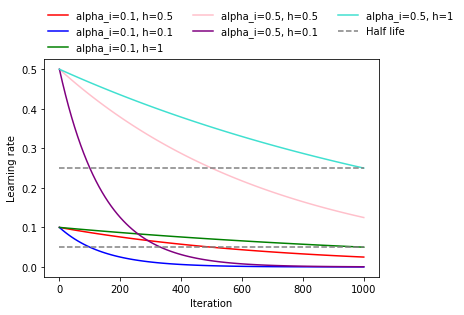

In [3]:
x = list(range(0,1001,10))

plt.plot(x, [example_exp_alpha(s,0.1,0.5) for s in x], color='red', label='alpha_i=0.1, h=0.5')
plt.plot(x, [example_exp_alpha(s,0.1,0.1) for s in x], color='blue', label='alpha_i=0.1, h=0.1')
plt.plot(x, [example_exp_alpha(s,0.1,1) for s in x], color='green', label='alpha_i=0.1, h=1')

plt.plot(x, [example_exp_alpha(s,0.5,0.5) for s in x], color='pink', label='alpha_i=0.5, h=0.5')
plt.plot(x, [example_exp_alpha(s,0.5,0.1) for s in x], color='purple', label='alpha_i=0.5, h=0.1')
plt.plot(x, [example_exp_alpha(s,0.5,1) for s in x], color='turquoise', label='alpha_i=0.5, h=1')
plt.plot([0, 1000], [0.25, 0.25], '--', color='grey', label='Half life')
plt.plot([0, 1000], [0.05, 0.05], '--', color='grey')
plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=3, borderaxespad=0, frameon=False)
plt.xlabel('Iteration')
plt.ylabel('Learning rate')
plt.show()

Clearly, for a 'per' alpha function a higher $a_i$ produces a faster learning rate and the rate of decrease of learning rate is always constant for a given number of iterations.  

For an 'exp' alpha function a higher $a_i$ produces a faster initial learning rate. The rate of decrease of learning rate can be fine-tuned with this function, but for comparison a low $a_i$ and $h=0.5$ will produce similar results.
As $h$ is increased the alpha function approaches a horizontal line - for $h>10$ the alpha function is almost constant at $a_i$. As $h$ approaches 0 the alpha function approaches a vertical line, indicating that only the first iteration of training affects the matrix. A smaller $h$, therefore, leads to less overfitting, but too great an $h$ would lead to significant underfitting to the data.

Based on the graphs above, the initial values to be tested are:

- $a_i$: 0.5, 1
- $h$: 0.2, 0.4

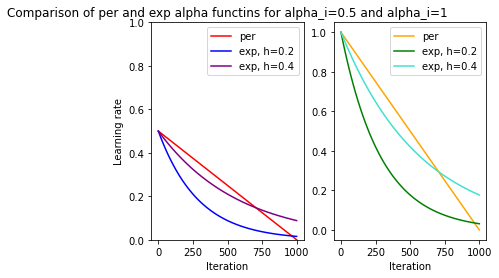

In [4]:
plt.subplot(1,2,1)
plt.plot(x, [example_per_alpha(s,0.5) for s in x], color='red', label='per')
plt.plot(x, [example_exp_alpha(s,0.5,0.2) for s in x], color='blue', label='exp, h=0.2')
plt.plot(x, [example_exp_alpha(s,0.5,0.4) for s in x], color='purple', label='exp, h=0.4')
plt.title('Comparison of per and exp alpha functins for alpha_i=0.5 and alpha_i=1')
plt.ylim(0.0,1.0)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Learning rate')

plt.subplot(1,2,2)
plt.plot(x, [example_per_alpha(s,1) for s in x], color='orange', label='per')
plt.plot(x, [example_exp_alpha(s,1,0.2) for s in x], color='green', label='exp, h=0.2')
plt.plot(x, [example_exp_alpha(s,1,0.4) for s in x], color='turquoise', label='exp, h=0.4')
plt.legend()
plt.xlabel('Iteration')
plt.show()

### 2.2.4 Theta function

Two theta functions are considered: Gaussian and non-Gaussian.

A non-Gaussian function returns `1` when applied to the BMU or an immediate neighbour of the BMU. Therefore when a non-Gaussian function is applied, only the BMU and its immediate neighbours are updated, and for all other nodes equation $(1)$ becomes:

$$ w_{u'v'}^{s+1} = w_{u'v'}^s + 0 = w_{u'v'}^s $$

indicating no change to the weight vector.

A Gaussian function returns a continuous value between 0 and 1 depending on the distance between the given weight vector $w_{u'v'}$ and the BMU $ w_{u'v'}$ according to a Gaussian distribution as shown in Figure 1.

The code used to train the matrix using a Gaussian function is in the folder `featureextractionsom/functions/somap.py`:

``` python
def theta_fixed(u: int, v: int, u_prime: int, v_prime: int) -> float:
	"""
	Theta function: determines which nodes are altered
	Extent of effect varies with Gaussian function centred on
	Best Matching Unit.
    Location of BMU is u, v and location of vector to be altered is u_prime, v_prime.
	"""
	x_portion = ((u_prime - u) ** 2) / 2
	y_portion = ((v_prime - v) ** 2) / 2

	theta_value = np.exp(-(x_portion + y_portion))

	return theta_value
```

![gaussian function](notebook_images/gaussian_2d.png) _Figure 1: Gaussian distribution across x and y. In practice, the peak of the function will appear at the BMU. Image credit: Krishnavedala, 2014_

## 2.3 Other parameters to consider

The training algorithm was tested using a range of values $s$ (number of iterations) and using matrices of different sizes. The choice of $s$ had wide ranging impact because it influences the $\alpha$ function as well as affecting the training size of the SOM. Too high a value of $s$ could lead to overfitting of the matrix to the training data, but too low could lead to underfitting.

The size was initially allowed to vary with the number of iterations but later adjusted for given $s$ to find the optimal number of nodes to use. Too small a matrix led to all areas responding almost equally to any input data, but too large a matrix leads to large portions of the matrix not responding to any data.

## References

Krishnavedala (2014) 'Isometric plot of a two dimensional Gaussian function.'. Shared by CC0 license via [wikimedia commons](https://commons.wikimedia.org/wiki/File:Gaussian_2d.svg)  [Accessed 15/04/2020]
